#<font color='Blue'> Weiyi Chen

# MTH9879 Homework 6

Assigned: March 10, 2015.
Due: March 24, 2015 by 6pm. 

## Comparison of estimators

### Set up R environment.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip'
Content type 'application/zip' length 695952 bytes (679 Kb)
opened URL
downloaded 679 Kb

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip'
Content type 'application/zip' length 2406 bytes
opened URL
downloaded 2406 bytes



### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [9]:
%%R 
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")
load('tq.rData')

install.packages('highfrequency')
library(highfrequency)
source('RvEstimators.R')

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip'
Content type 'application/zip' length 695952 bytes (679 KB)
opened URL
downloaded 679 KB

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip'
Content type 'application/zip' length 2406 bytes
opened URL
downloaded 2406 bytes

also installing the dependencies ‘xts’, ‘zoo’

trying URL 'http://lib.stat.cmu.edu/R/CRAN/src/contrib/xts_0.9-7.tar.gz'
Content type 'application/x-gzip' length 470815 bytes (459 KB)
opened URL
downloaded 459 KB

trying URL 'http://lib.stat.cmu.edu/R/CRAN/src/contrib/zoo_1.7-12.tar.gz'
Content type 'application/x-gzip' length 839181 bytes (819 KB)
opened URL
downloaded 819 KB

trying URL 'http://lib.stat.cmu.edu/R/CRAN/src/contrib/highfrequency_0.4.tar.gz'
Content type 'application/x-gzip' length 1904563 bytes (1.8 MB)
opened URL
downloaded 1.8 MB


The downloaded source packages are in
	‘/private/var/folders/ry/6kkpl_ys3vl4z09tb97h1wdw0000gn/T/RtmpS9Pl8d/dow

###Problem 1

(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

### <font color='blue'> Solution:

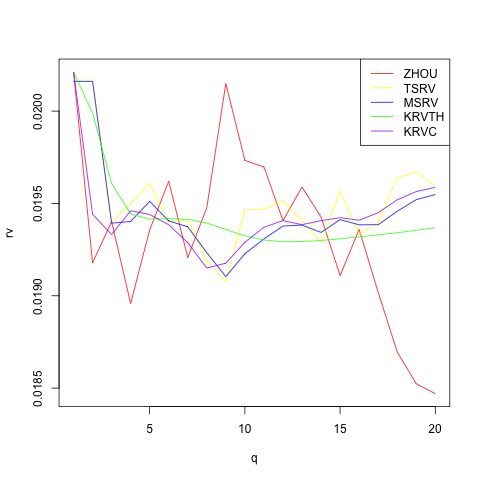

In [20]:
%%R
# write into a function for later use

plot_rv <- function(px) {
    
    # derive log price

    p <- log(as.numeric(px))

    # Compute RV as function of sampling frequency q

    freq     <- 20
    rv_ZHOU  <- sapply(1:freq, function(q){sqrt(ZHOU(p, q))})
    rv_TSRV  <- sapply(1:freq, function(q){sqrt(TSRV(p, q))})
    rv_MS    <- sapply(1:freq, function(q){sqrt(MSRV(p, q))})
    rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(p, q))})
    rv_KRVC  <- sapply(1:freq, function(q){sqrt(KRVC(p, q))})

    # Plot

    plot(1:freq, rv_ZHOU, col="red", type='l', ylab='rv', xlab='q')
    lines(rv_TSRV    , col="yellow")
    lines(rv_MS      , col="blue")
    lines(rv_KRVTH   , col="green")
    lines(rv_KRVC    , col="purple")
    legend("topright", 
           c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),
           lty = c(1,1,1,1,1), 
           col=c("red","yellow","blue","green","purple"))
}

plot_rv(tqBAC$PRICE)

(b) Repeat part (a) for the BAC mid-quote series.

### <font color='Blue'>Solution:

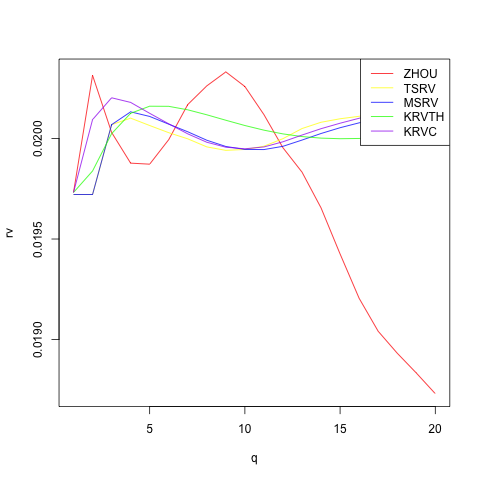

In [22]:
%%R
plot_rv((as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2)

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

### <font color='Blue'>Solution:

<font color='blue'>
I recommend KRVTH, because it is the smoothest, robustest and converges fastest.

I recommend 13, KRVTH stays stable after $q \approx 13$.

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [25]:
%%R
load('tq.rData')
library(highfrequency)
install.packages('quantmod')
library(quantmod)

also installing the dependency ‘TTR’

trying URL 'http://lib.stat.cmu.edu/R/CRAN/src/contrib/TTR_0.22-0.tar.gz'
Content type 'application/x-gzip' length 302852 bytes (295 KB)
opened URL
downloaded 295 KB

trying URL 'http://lib.stat.cmu.edu/R/CRAN/src/contrib/quantmod_0.4-4.tar.gz'
Content type 'application/x-gzip' length 133890 bytes (130 KB)
opened URL
downloaded 130 KB


The downloaded source packages are in
	‘/private/var/folders/ry/6kkpl_ys3vl4z09tb97h1wdw0000gn/T/RtmpS9Pl8d/downloaded_packages’
Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘quantmod’

The following objects are masked from ‘package:highfrequency’:

    getPrice, has.Qty



(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

### <font color='Blue'>Solution:

In [32]:
%%R
aggregate_tq <- function(tq, k){
    return (aggregatets(tq, k=k, on="seconds"))
}

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

### <font color='Blue'>Solution:

In [33]:
%%R
corr_tq <- function(tq1, tq2){
    return (cor(tq1, tq2))
}

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

### <font color='Blue'>Solution:

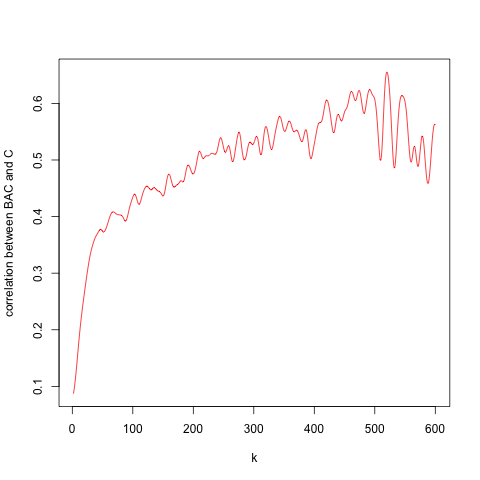

In [36]:
%%R
logCor <- function (k, tq1 = tqBAC, tq2 = tqC){
    tq_p1 <- diff(log(as.numeric(aggregate_tq(tq1, k)$PRICE)))
    tq_p2 <- diff(log(as.numeric(aggregate_tq(tq2, k)$PRICE)))
    return (corr_tq(tq_p1, tq_p2))
}

plot(2:600, ksmooth(2:600, sapply(2:600, function(k){logCor(k)}), "normal", bandwidth = 10)$y,
     col="red", type = "l", ylab="correlation between BAC and C",xlab="k")

(d) Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

### <font color='Blue'>Solution:

<font color='Blue'>
Yes, it is consistent, because the larger of $k$, the larger the estimator. The introday correlation between BAC and C returns on 04-May-2012 is $0.04299153$.

In [37]:
%%R
logCor(2)

[1] 0.04299153


(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

### <font color='Blue'>Solution:</font>

In [54]:
%%R

# get symbols

getSymbols("BAC", src = "yahoo", from = "2012-01-01", to = "2012-12-31")
getSymbols("C"  , src = "yahoo", from = "2012-01-01", to = "2012-12-31")

# Calculate historical correlation of daily BAC and C returns

tq_BAC_adj <- diff(log(as.numeric(BAC$BAC.Adjusted)))
tq_C_adj   <- diff(log(as.numeric(C$C.Adjusted)))
cor(tq_BAC_adj, tq_C_adj)

[1] 0.7996545


## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

### <font color='Blue'>Solution:

<font color='Blue'>
The Hayashi-Yoshida estimator is
\begin{equation}
HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}
\end{equation}
where
$$v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset}$$

When two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, then $v_{ij} = 1$ for any $i,j$.

\begin{equation}
HY_t = \sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}
= \sum_{i=j}^t(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\times 1 
= \sum_{i=1}^t\Delta p^{(1)}_i \Delta p^{(2)}_i
\end{equation}

Assign $t=T$, and take the average, we derive the realized covariance estimator 

\begin{equation}
HY_t = \frac1T\sum_{i=1}^T\Delta p^{(1)}_i \Delta p^{(2)}_i
\end{equation}

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [45]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip'
Content type 'application/zip' length 39431 bytes (38 KB)
opened URL
downloaded 38 KB



### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

### <font color='Blue'>Solution:


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16



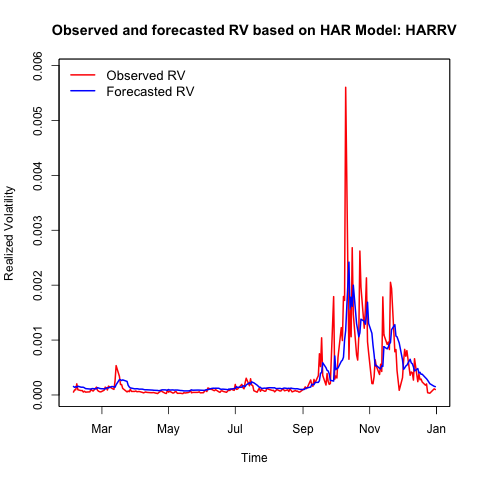

In [48]:
%%R 
# write into function for later fast-use

HAR_RV <- function(RV) {
    RV <- RV[!is.na(RV)]
    RV <- RV['2008']

    x <- harModel(data=RV , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1, transform=NULL)
    plot(x)
    print(summary(x))  
}

# apply function

data(realized_library);
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance; 
HAR_RV(DJI_RV)

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

### <font color='Blue'>Solution:</font>


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16



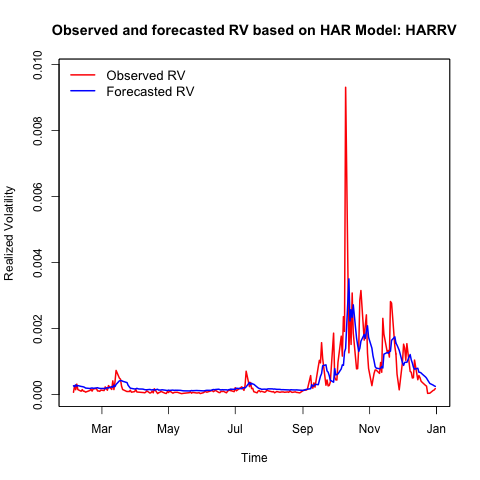

In [49]:
%%R 
HAR_RV(spx.krv)

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

### <font color='Blue'>Solution:</font>

<font color='Blue'>

|   Coef     |  DJI RV   |  SPX KRV  |
|------------|-----------|-----------|
| $\beta_0$  | 4.432e-05 | 7.164e-05 |
| $\beta_1$  | 1.586e-01 | 1.523e-01 |
| $\beta_2$  | 6.213e-01 | 5.512e-01 |
| $\beta_3$  | 8.721e-02 | 1.501e-01 |

They are similar and most weight is on the 5-day RV ($\beta_2$).

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

### <font color='Blue'>Solution:</font>

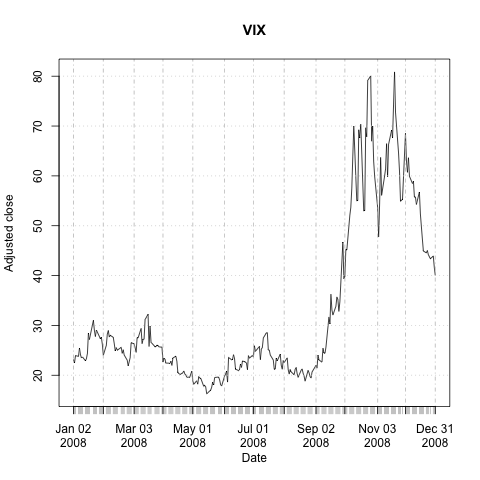

In [59]:
%%R
getSymbols("^VIX", src = "yahoo", from = "2008-01-01", to = "2008-12-31")
plot(VIX$VIX.Adjusted, main = "VIX", ylab="Adjusted close", xlab="Date")

###Problem 4.e
Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.

### <font color='DarkBlue'>Answer:</font>
<font color='darkblue'>
Plot as below:
</font>

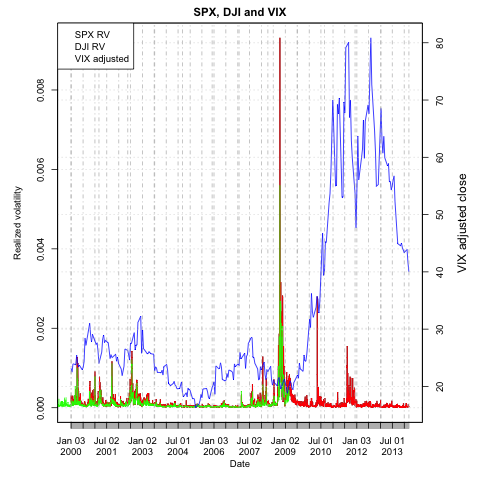

In [83]:
%%R
par(mar = c(5,5,2,5),cex=0.8)
plot(spx.krv, main="SPX, DJI and VIX", ylab="Realized volatility", xlab="Date")
lines(spx.krv, col="red")
lines(DJI_RV, col="green")

par(new = T)
plot(VIX$VIX.Adjusted, col="blue", axes=F, main=NA, xlab=NA, ylab=NA)


# adding a scale on the right hand axis

axis(side = 4)
mtext(side = 4, line = 3, "VIX adjusted close")
legend("topleft",legend=c("SPX RV ","DJI RV", "VIX adjusted"),col=c("red", "green", "blue"))


<font color='blue'>
Comment: VIX is a good indicator as the volatility of SPX and DJI are highly correlated.